# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving liquor_store_sales.csv to liquor_store_sales.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['liquor_store_sales.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
data.head(5)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [5]:
data.describe()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
count,128355.000000,128355.000000,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037,7.188161,22.624213
std,0.404454,3.645826,28.924944,30.640156,239.693277
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.330000,0.000000,1.000000
75%,2017.000000,10.000000,3.250000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

              RetailSales  RetailTransfers  WarehouseSales
ItemType                                                  
BEER            209763.11        234924.44      2437617.32
DUNNAGE              0.00             0.00       -45331.00
KEGS                 0.00             0.00        43558.00
LIQUOR          309847.85        334176.41        33173.32
NON-ALCOHOL       8109.97          9058.37         8656.72
REF                281.34           171.92        -6754.00
STR_SUPPLIES       995.98          3594.70            0.00
WINE            313400.42        340710.51       433009.47


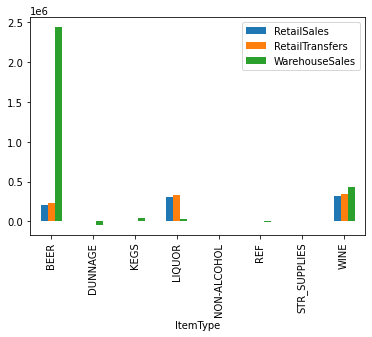

In [6]:
data_sum = data[['RetailSales', 'RetailTransfers', 'WarehouseSales','ItemType']].groupby(['ItemType']).agg('sum')
print(data_sum)
data_sum.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

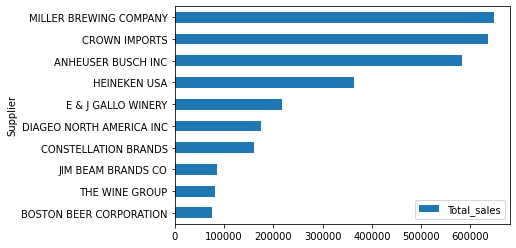

In [7]:
#prepare table of suppliers with total_sales
data2 = data.groupby(['Supplier'], as_index=False)[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
data2['Total_sales']= data2['RetailSales']+data2['RetailTransfers']+data2['WarehouseSales']

#sort values by total_sales, limit to top 10
data2_2=data2[['Supplier','Total_sales']].sort_values(by=['Total_sales'], ascending=False).head(10)
data2_3=data2_2.sort_values(by=['Total_sales'], ascending=True)
data2_3

data2_3.plot.barh(x='Supplier', y='Total_sales')

## Question: how to reverse the order of suppliers' display ?? now it's from lowest => highest total_sales

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

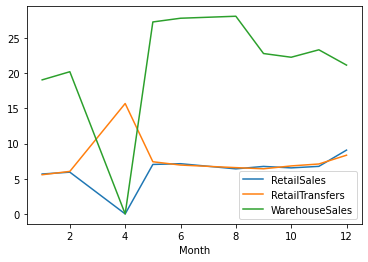

In [8]:
data3 = data[['RetailSales', 'RetailTransfers', 'WarehouseSales','Month']].groupby(["Month"]).agg("mean")
data3.plot()

## 4. Plot the same information as above but as a bar chart.

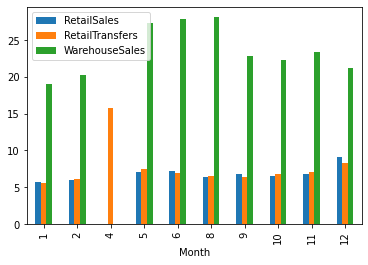

In [9]:
data3.plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

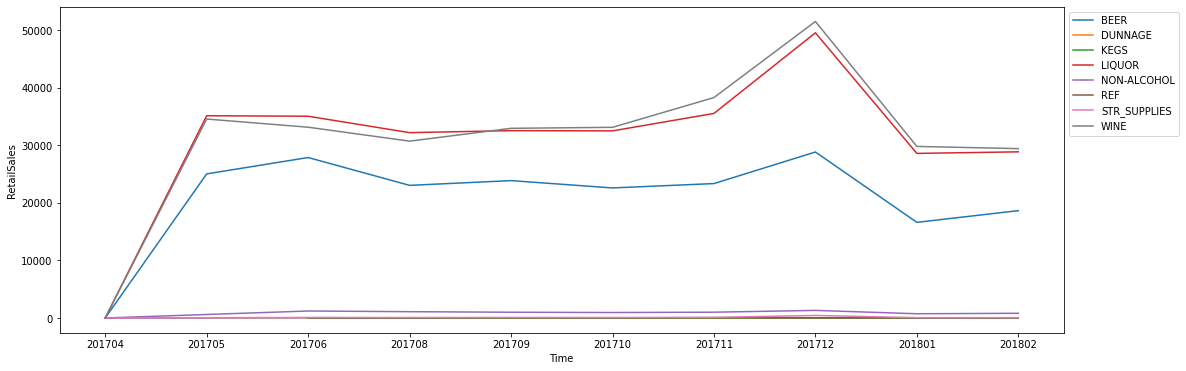

In [15]:
data4 = data

#firstly group by, to reduce the execution burden
data4 = data4[['RetailSales', 'ItemType', 'Year','Month']].groupby(['ItemType','Year','Month']).agg("sum").reset_index()

# concact year & month into one col
data4['Time'] = np.where(data4['Month']>= 10, data4['Year'].astype(str)+data4['Month'].astype(str), data4['Year'].astype(str)+'0'+data4['Month'].astype(str))
data4

# aggregate data by Itemtype & Time, sum the retail sales
data4 = data4[['RetailSales', 'ItemType', 'Time']].groupby(['ItemType','Time']).agg("sum").reset_index()
data4 = data4.sort_values(['ItemType','Time'])
data4

plt.figure(figsize=(18, 6))
sns.lineplot(x='Time', y='RetailSales', data=data4, hue='ItemType')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


## 6. Plot the same information as above but as a bar chart.

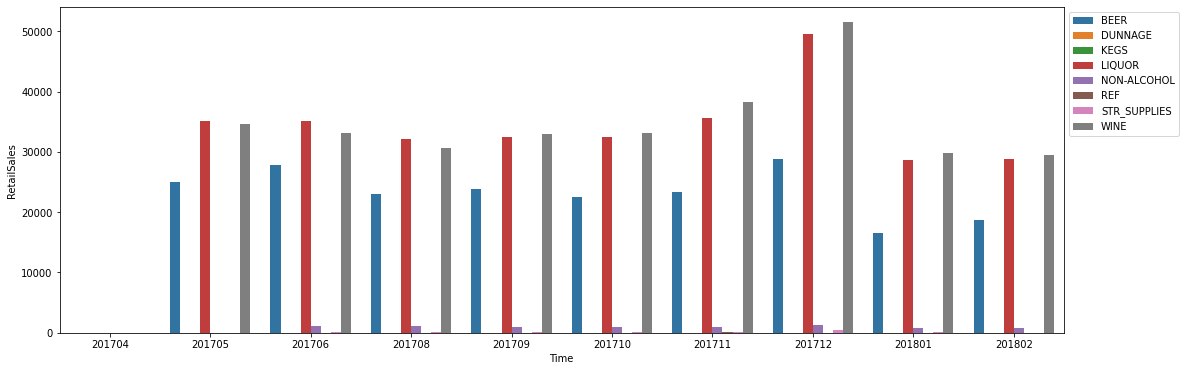

In [12]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Time', y='RetailSales', data=data4, hue='ItemType')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

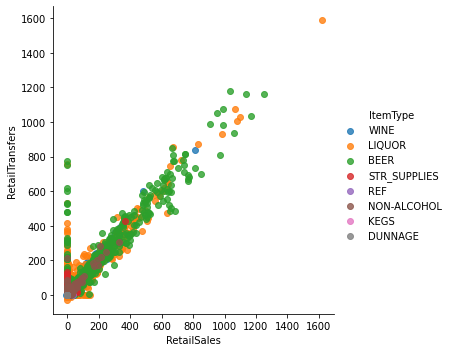

In [13]:
sns.lmplot(x='RetailSales', y='RetailTransfers', data=data, hue="ItemType",fit_reg=False)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

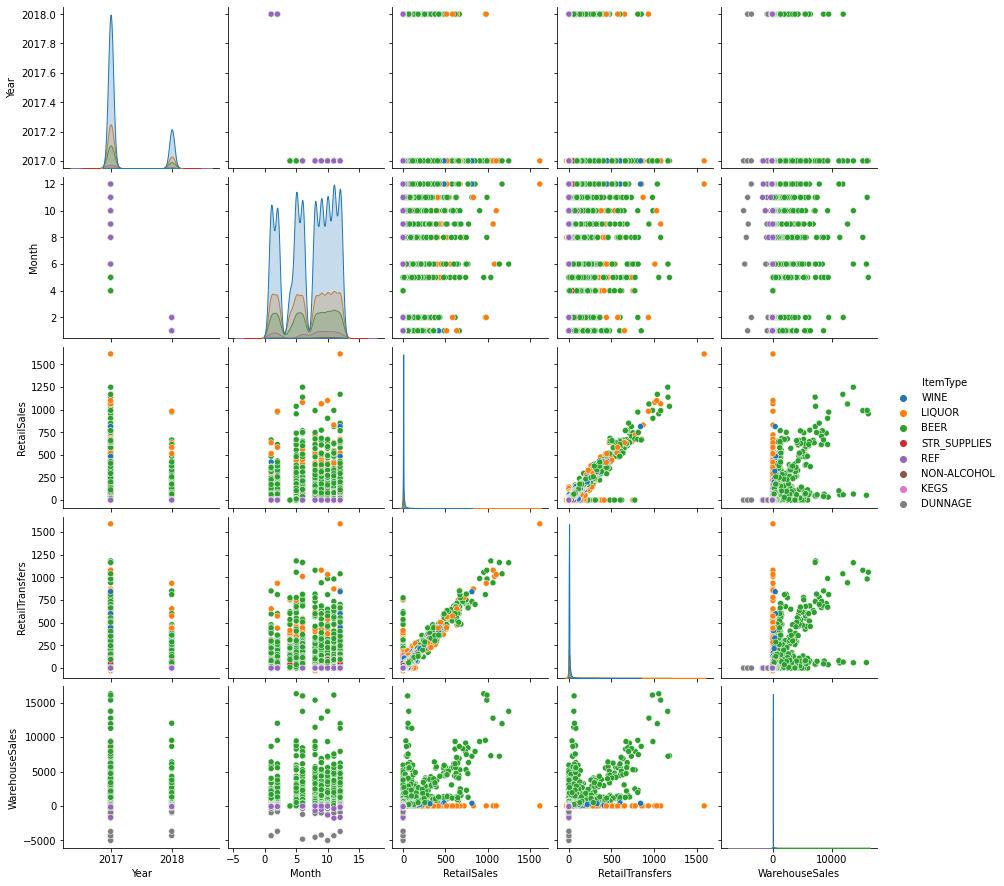

In [14]:
sns.pairplot(data,hue="ItemType")